<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# Eletronics Purchase Prediction

Today you are a machine learning engineer in the Department of Marketing and Inventory at Walmart Labs. You have access to the Walmart server data, specifically the Electronics section. However, there is no customer facing information, but you do have access to timestamped data regarding product viewing/carting/purchasing. We will use this data to build a model of whether or not some product will be purchased.

Data is adapted from [e-commerce behavior data on Kaggle](https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store). 

This file contains behavior data from a large multi-category store. Each row in the file represents an event. All events are related to products and users. Each event has a many-to-many relationship between users and products. 

## Learning Objectives

At the end of this session, you will be able to

- Leverage `pandas_profiling` for fast data understanding
- Practice data preprocessing
- Build logistic regression / SVM / Gradient Boosting
- Evaluate models with proper metrics
- Interpret black box models with SHAP
- Generate optimal pipeline for classification task using AutoML

## Task 1: Load data

Let's start by looking at the descriptions before loading in the csv files.

1. Use the `IPython.display` module to view the `some_column_descriptions.png` file. Look through the column names and descriptions to get an idea of what the data is.

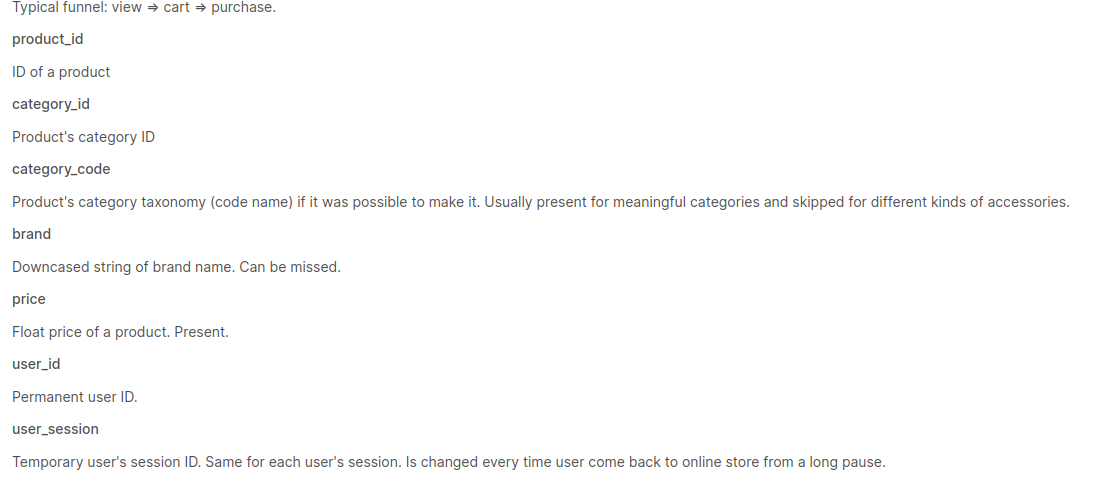

In [1]:
from IPython.display import Image, display
# change the filename to wherever you downloaded/uploaded the file
filename = '../img/some_column_descriptions.png'
display(Image(filename=filename))

The dataset has User-journey data, i.e., it tracks information on user/product pairs over time to see if the combination results in a purchase.

2. Look at the `user_journey_descriptions.png` file. Review the data sample to get a sense of what information we are tracking for each user/product pair.

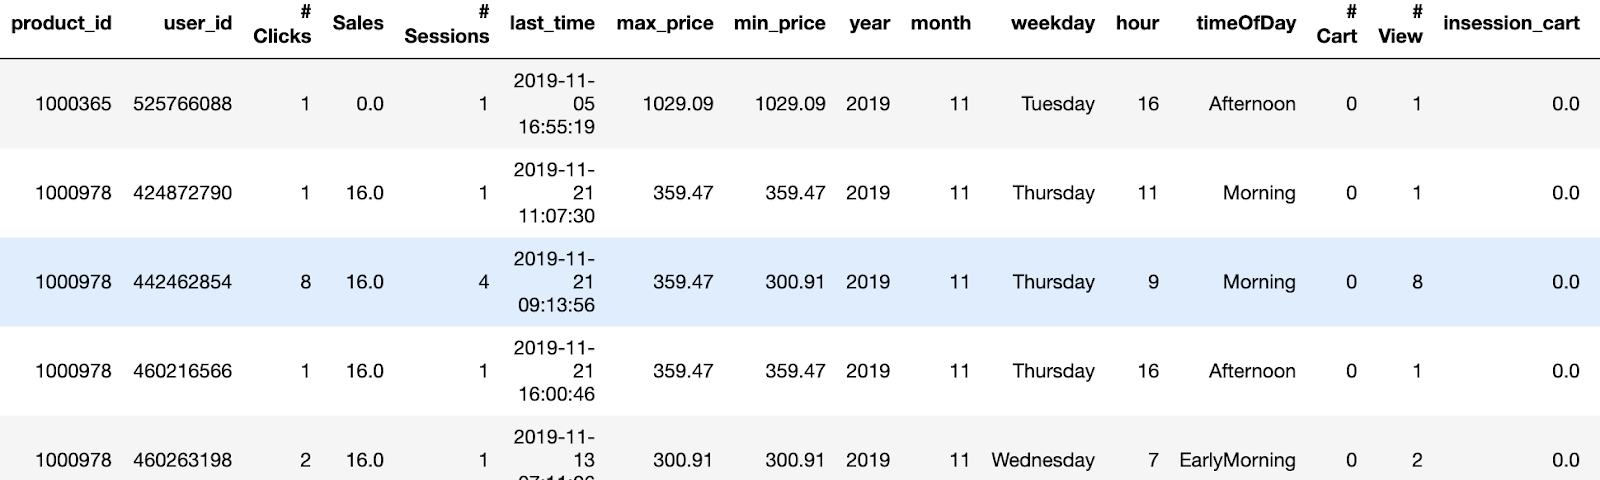

In [2]:
# change path to wherever you uploaded/downloaded the file
filename='../img/user_journey_descriptions.png'
display(Image(filename=filename))

The dataset we are working with is essentially what we have screenshotted above, but has been anonymized by removing product IDs and user IDs.

3. Use the pandas `read_csv()` and `head()` functions to read in the training data (`../dat/train.csv.gz`) and look at the first few rows.

    Note the `Purchase` column has values either 0 (not purchased) or 1 (purchased).

In [3]:
import pandas as pd
path = "../dat/train.csv.gz"
train_df = pd.read_csv(path)     # YOUR CODE HERE

In [4]:
train_df.head(10)  # YOUR CODE HERE

NumOfEventsInJourney  NumSessions  interactionTime  maxPrice  minPrice  \
0                     1            1              0.0    154.41    154.41   
1                     1            1              0.0     92.67     92.67   
2                     1            1              0.0    155.71    155.71   
3                     1            1              0.0    898.32    898.32   
4                     1            1              0.0    146.21    146.21   
5                     1            1              0.0    244.54    244.54   
6                     1            1              0.0    234.24    234.24   
7                     1            1              0.0    463.31    463.31   
8                     1            1              0.0    253.25    253.25   
9                     1            1              0.0    450.18    450.18   

   NumCart  NumView  InsessionCart  InsessionView  year  month weekday  \
0        0        1              0              1  2019     11     Sat   
1        0        1              0              1  2019     11      Fr   
2        0        1              0              1  2019     11     Thu   
3        0        1              0              1  2019     11     Mon   
4        0        1              0              1  2019     11     Tue   
5        0        1              0              1  2019     11     Sat   
6        0        1              0              1  2019     11     Sat   
7        0        1              0              1  2019     11     Wed   
8        0        1              0              1  2019     11     Thu   
9        0        1              0              1  2019     11     Mon   

   timeOfDay  Weekend  Purchase  
0    Morning        0         0  
1       Dawn        0         0  
2  Afternoon        0         0  
3       Noon        0         0  
4       Noon        0         0  
5       Noon        0         0  
6    Morning        0         0  
7    Evening        0         0  
8  Afternoon        0         0  
9    Morning        0         0

4. What is the dimension of the training data?

In [5]:
train_df.info(), train_df.shape


# YOUR CODE HERE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645816 entries, 0 to 645815
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NumOfEventsInJourney  645816 non-null  int64  
 1   NumSessions           645816 non-null  int64  
 2   interactionTime       645816 non-null  float64
 3   maxPrice              645816 non-null  float64
 4   minPrice              645816 non-null  float64
 5   NumCart               645816 non-null  int64  
 6   NumView               645816 non-null  int64  
 7   InsessionCart         645816 non-null  int64  
 8   InsessionView         645816 non-null  int64  
 9   year                  645816 non-null  int64  
 10  month                 645816 non-null  int64  
 11  weekday               645816 non-null  object 
 12  timeOfDay             645816 non-null  object 
 13  Weekend               645816 non-null  int64  
 14  Purchase              645816 non-null  int64  
dtype

(None, (645816, 15))

In [6]:
train_df.describe()

NumOfEventsInJourney    NumSessions  interactionTime       maxPrice  \
count         645816.000000  645816.000000     6.458160e+05  645816.000000   
mean               1.033234       1.019698     5.817817e+03     291.463756   
std                0.201823       0.156247     7.117031e+04     356.312497   
min                1.000000       1.000000     0.000000e+00       0.000000   
25%                1.000000       1.000000     0.000000e+00      68.470000   
50%                1.000000       1.000000     0.000000e+00     164.480000   
75%                1.000000       1.000000     0.000000e+00     360.340000   
max               12.000000      11.000000     2.526451e+06    2574.070000   

            minPrice        NumCart        NumView  InsessionCart  \
count  645816.000000  645816.000000  645816.000000  645816.000000   
mean      291.363931       0.046236       0.972941       0.050812   
std       356.210866       0.217380       0.283256       0.226889   
min         0.000000       0.000000       0.000000       0.000000   
25%        68.470000       0.000000       1.000000       0.000000   
50%       164.370000       0.000000       1.000000       0.000000   
75%       360.340000       0.000000       1.000000       0.000000   
max      2574.070000       9.000000       9.000000       8.000000   

       InsessionView      year     month   Weekend       Purchase  
count  645816.000000  645816.0  645816.0  645816.0  645816.000000  
mean        1.198117    2019.0      11.0       0.0       0.013900  
std         0.875657       0.0       0.0       0.0       0.117077  
min         0.000000    2019.0      11.0       0.0       0.000000  
25%         1.000000    2019.0      11.0       0.0       0.000000  
50%         1.000000    2019.0      11.0       0.0       0.000000  
75%         1.000000    2019.0      11.0       0.0       0.000000  
max        68.000000    2019.0      11.0       0.0       1.000000

5. Similarly, read in the test data `../dat/test.csv.gz` and check its dimension.

In [7]:
path2 = "../dat/test.csv.gz"
test_df = pd.read_csv(path2) # YOUR CODE HERE
test_df.shape

(430544, 15)

## Task 2: Understand data

Our goal here is to predict whether a customer/product pair will result in a purchase. 
To do this, we will want to identify the most important features for classification. 

Before digging into each column, let's leverage `pandas_profiling`, that goes beyond `pd.DataFrame.describe()`, to get a big picture of our data set. 

1. From `pandas_profiling` import `ProfileReport`. 
    
    For faster iteration, create a profile report object `profile` with 10,000 samples from `train_df`. 
    
    Set its `title` as "Pandas Profiling Electronics Purchase Report". 
    
    For sampling, use `pd.DataFrame.sample(10000, randome_state=3)`. 

In [8]:


from pandas_profiling import ProfileReport

In [9]:
# YOUR CODE HERE
prof_name = "Pandas Profiling Electronics Purchase Report"
profile =ProfileReport(train_df, title = prof_name) # YOUR CODE HERE

   Show the report inside the notebook, go over the report and check each tab; especially the "Alerts". 

In [70]:
%%time
profile.to_notebook_iframe()

CPU times: user 46.5 ms, sys: 15.9 ms, total: 62.5 ms
Wall time: 63.6 ms


2. Pandas profiling Profile reports that there are 5 numeric variables and 11 categorical variables. Let's print out the datatype of each feature (column) and understand how the profiler infers data type. 

In [11]:
train_df.dtypes #YOUR CODE HERE

NumOfEventsInJourney      int64
NumSessions               int64
interactionTime         float64
maxPrice                float64
minPrice                float64
NumCart                   int64
NumView                   int64
InsessionCart             int64
InsessionView             int64
year                      int64
month                     int64
weekday                  object
timeOfDay                object
Weekend                   int64
Purchase                  int64
dtype: object

3. From the report, we see that `year`, `month`, and `Weekend` were "Rejected" as there is only one distinct value for each column. 
These features are not informative, so we remove the three features from the training set. To do this, pass the `columns` argument to the `.drop()` method. 
Make sure to use `inplace=True` to modify the DataFrame. 
Print the shape of the DataFrames to verify the columns were dropped.

In [12]:
assert train_df.shape[1] == 15
train_df.drop(columns = ["year" , "month" , "Weekend"], inplace= True)  # YOUR CODE HERE
assert train_df.shape[1] == 12

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645816 entries, 0 to 645815
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NumOfEventsInJourney  645816 non-null  int64  
 1   NumSessions           645816 non-null  int64  
 2   interactionTime       645816 non-null  float64
 3   maxPrice              645816 non-null  float64
 4   minPrice              645816 non-null  float64
 5   NumCart               645816 non-null  int64  
 6   NumView               645816 non-null  int64  
 7   InsessionCart         645816 non-null  int64  
 8   InsessionView         645816 non-null  int64  
 9   weekday               645816 non-null  object 
 10  timeOfDay             645816 non-null  object 
 11  Purchase              645816 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 59.1+ MB


4. Repeat the steps for `test_df`:

In [14]:
test_df.drop(columns = ["year" , "month" , "Weekend"], inplace= True)  # YOUR CODE HERE
assert test_df.shape[1] == train_df.shape[1]

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430544 entries, 0 to 430543
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   NumOfEventsInJourney  430544 non-null  int64  
 1   NumSessions           430544 non-null  int64  
 2   interactionTime       430544 non-null  float64
 3   maxPrice              430544 non-null  float64
 4   minPrice              430544 non-null  float64
 5   NumCart               430544 non-null  int64  
 6   NumView               430544 non-null  int64  
 7   InsessionCart         430544 non-null  int64  
 8   InsessionView         430544 non-null  int64  
 9   weekday               430544 non-null  object 
 10  timeOfDay             430544 non-null  object 
 11  Purchase              430544 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 39.4+ MB


5. As you can see from the profile report, `weekday` and `timeOfDay` each has 7 distinct values. 
Convert these non-numeric features to numeric. 

    These feature values are ordered temporally, so it makes sense to convert them to numeric type. 
    Follow the example given for the `weekday` column to update the `timeOfDay` column.
    Use the `.head()` method to inspect the dataset after the transformations.

In [16]:
weekday_str2num = {
    s: i+1 for i, s in enumerate(['Mon', 'Tue', 'Wed', 'Thu', 'Fr', 'Sat', 'Sun'])
}
train_df['weekday'] = train_df['weekday'].replace(weekday_str2num)
train_df['weekday'].unique()

array([6, 5, 4, 1, 2, 3, 7])

In [17]:
tOd_list=list(train_df["timeOfDay"].unique())
tOd_list

['Morning', 'Dawn', 'Afternoon', 'Noon', 'Evening', 'EarlyMorning', 'Night']

In [18]:
timeOfDay_str2num = {s: i+1 for i, s in enumerate(["EarlyMorning", "Morning", "Noon", "Afternoon", "Evening", "Night", "Dawn"])}
train_df['timeOfDay'] = train_df['timeOfDay'].replace(timeOfDay_str2num) # YOUR CODE HERE
train_df['timeOfDay'].unique()

array([2, 7, 4, 3, 5, 1, 6])

6. Do the same for `test_df`, that is, to convert `weekday` and `timeOfDay` into numeric type. 

In [19]:
test_df['weekday'] = test_df['weekday'].replace(weekday_str2num) # YOUR CODE HERE
test_df['timeOfDay'] = test_df['timeOfDay'].replace(timeOfDay_str2num) # YOUR CODE HERE

7. Use the `Purchase` column in training set to determine the proportion of user journeys that result in purchases.  Compare it to what the profile reports. Is the dataset balanced?

In [20]:
train_df.Purchase.value_counts()[1] , train_df.Purchase.shape[0]

(8977, 645816)

In [21]:
print("number of purchases vs non-purchases in train set:")
print(train_df.Purchase.value_counts())
print(f"percent of rows resulting in purchase: {train_df.Purchase.value_counts()[1] / train_df.Purchase.shape[0] * 100}") # YOUR CODE HERE

number of purchases vs non-purchases in train set:
0    636839
1      8977
Name: Purchase, dtype: int64
percent of rows resulting in purchase: 1.3900244032355966


## Task 3: Preprocess Data

Correlated features in general don't improve models (although it depends on the specifics of the problem like the number of variables and the degree of correlation), but they affect specific models in different ways and to varying extents:

- For linear models (e.g., linear regression or logistic regression), [multicolinearity](https://en.wikipedia.org/wiki/Multicollinearity) can yield [solutions that are wildly varying and possibly numerically unstable](https://en.wikipedia.org/wiki/Multicollinearity#Consequences).
- Random forest can be good at detecting interactions between different features, but highly correlated features can mask these interactions.
More generally, this can be viewed as a special case of [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor). A simpler model is preferable, and, in some sense, a model with fewer features is simpler. The concept of [minimum description length](https://en.wikipedia.org/wiki/Minimum_description_length) makes this more precise ([ref](https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features)).

1. How many features does our dataset currently have?

In [22]:
train_df.shape[1] - 1  # YOUR CODE HERE

11

2. Drop the features with high correlation.

    In the "Correlations" tab in the profile report, you can find heatmap using five different correlation metrics; toggle correlation desciptions if any one of them looks foreign to you.  

    We'll remove high correlated features by looking at each pair of features, and if they are highly correlated (at least 0.8), we won't include the second feature in the pair. Store the remaining set of features (the ones you didn't drop) in dataframes `train_df_reduced`. You are given most the code, make sure that you understand what each line does.
    
    First, calculate the correlation with just 10,000 samples.

In [23]:
train_small_df = train_df.copy().sample(n=int(1e4), random_state=12) 
cor = train_small_df.corr(method='spearman')

In [24]:
cor

NumOfEventsInJourney  NumSessions  interactionTime  \
NumOfEventsInJourney              1.000000     0.795622         0.999832   
NumSessions                       0.795622     1.000000         0.802800   
interactionTime                   0.999832     0.802800         1.000000   
maxPrice                          0.031191     0.028159         0.031361   
minPrice                          0.029715     0.026328         0.029859   
NumCart                           0.141729     0.123751         0.141022   
NumView                           0.499059     0.394661         0.499125   
InsessionCart                     0.136981     0.115542         0.136259   
InsessionView                     0.101944     0.014127         0.100429   
weekday                           0.027379     0.015675         0.027327   
timeOfDay                        -0.023344    -0.027232        -0.023242   
Purchase                          0.105189     0.085684         0.104799   

                      maxPrice  minPrice   NumCart   NumView  InsessionCart  \
NumOfEventsInJourney  0.031191  0.029715  0.141729  0.499059       0.136981   
NumSessions           0.028159  0.026328  0.123751  0.394661       0.115542   
interactionTime       0.031361  0.029859  0.141022  0.499125       0.136259   
maxPrice              1.000000  0.999990 -0.006145  0.019346      -0.004600   
minPrice              0.999990  1.000000 -0.006181  0.018466      -0.004626   
NumCart              -0.006145 -0.006181  1.000000 -0.644357       0.937627   
NumView               0.019346  0.018466 -0.644357  1.000000      -0.605382   
InsessionCart        -0.004600 -0.004626  0.937627 -0.605382       1.000000   
InsessionView        -0.022898 -0.022959 -0.367483  0.450787      -0.334777   
weekday               0.012550  0.012489  0.029769 -0.013602       0.034343   
timeOfDay            -0.007589 -0.007537 -0.020402  0.020405      -0.015170   
Purchase              0.007678  0.007593 -0.002159 -0.377282       0.007384   

                      InsessionView   weekday  timeOfDay  Purchase  
NumOfEventsInJourney       0.101944  0.027379  -0.023344  0.105189  
NumSessions                0.014127  0.015675  -0.027232  0.085684  
interactionTime            0.100429  0.027327  -0.023242  0.104799  
maxPrice                  -0.022898  0.012550  -0.007589  0.007678  
minPrice                  -0.022959  0.012489  -0.007537  0.007593  
NumCart                   -0.367483  0.029769  -0.020402 -0.002159  
NumView                    0.450787 -0.013602   0.020405 -0.377282  
InsessionCart             -0.334777  0.034343  -0.015170  0.007384  
InsessionView              1.000000  0.040709   0.057514 -0.227212  
weekday                    0.040709  1.000000  -0.032468  0.021450  
timeOfDay                  0.057514 -0.032468   1.000000 -0.051912  
Purchase                  -0.227212  0.021450  -0.051912  1.000000

In [25]:
import numpy as np
np.version.version

'1.21.6'

In [26]:
#import numpy as np

keep_columns = np.full(cor.shape[0], True)
for i in range(cor.shape[0] - 1):
    for j in range(i + 1, cor.shape[0] - 1):
        if (np.abs(cor.iloc[i, j]) >= 0.8):
            keep_columns[j] = False
selected_columns = train_df.columns[keep_columns]
train_df_reduced = train_df[selected_columns]

In [27]:
keep_columns

array([ True,  True, False,  True, False,  True,  True, False,  True,
        True,  True,  True])

In [28]:
print(selected_columns) 

Index(['NumOfEventsInJourney', 'NumSessions', 'maxPrice', 'NumCart', 'NumView',
       'InsessionView', 'weekday', 'timeOfDay', 'Purchase'],
      dtype='object')


3. How many columns are left in the DataFrame?

In [29]:
train_df_reduced.shape[1] # YOUR CODE HERE

9

In [30]:
train_df_reduced.columns

Index(['NumOfEventsInJourney', 'NumSessions', 'maxPrice', 'NumCart', 'NumView',
       'InsessionView', 'weekday', 'timeOfDay', 'Purchase'],
      dtype='object')

4. Remove the same features from the test set and save in a new dataframe `test_df_reduced`.

In [31]:
test_df_reduced = test_df[selected_columns] # YOUR CODE HERE
assert test_df_reduced.shape[1] == 9

5. Visualize the selected features and discuss your observations with your team.

    Again, for faster rendering, use the subset `train_small_df_reduced`. If time permits, experiment with some other visualizations of the data.

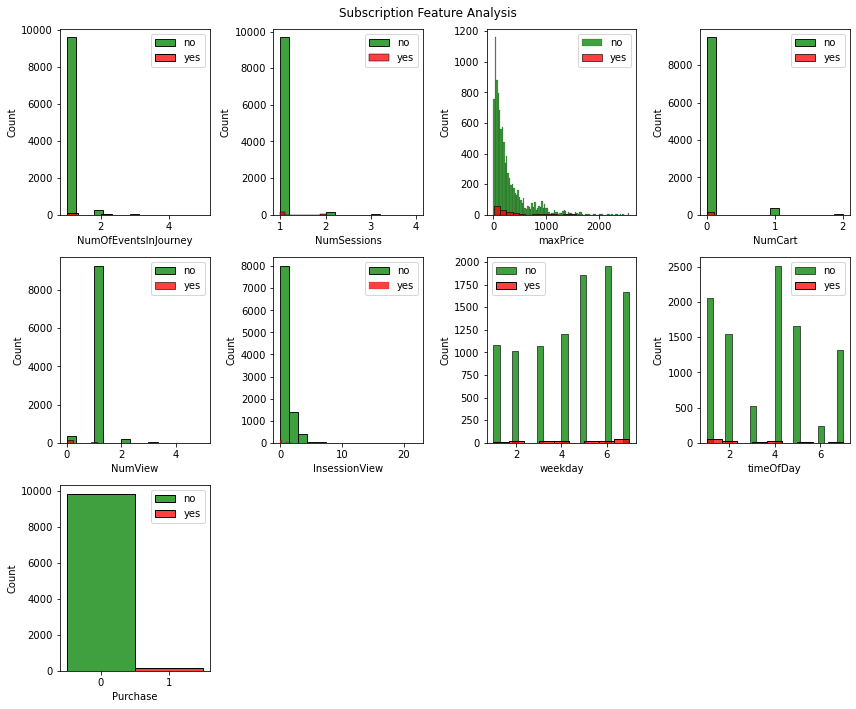

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
train_small_df_reduced = train_small_df[selected_columns]
fig = plt.figure(figsize=(12, 10))
j = 0
for i in train_df_reduced.columns:
    plt.subplot(3, 4, j + 1)
    j += 1
    sns.histplot(train_small_df_reduced[i][train_small_df_reduced['Purchase'] == 0], color='g', label='no')
    sns.histplot(train_small_df_reduced[i][train_small_df_reduced['Purchase'] == 1], color='r', label='yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95);

6. Make the NumPy arrays `X_train_reduced`, `X_test_reduced`, `y_train` and `y_test` from `train_df_reduced` and `test_df_reduced`. 

In [33]:
y_train = train_df_reduced['Purchase'].values
y_test = test_df_reduced['Purchase'].values # YOUR CODE HERE
X_train_reduced = train_df_reduced.drop(columns='Purchase').values
X_test_reduced = test_df_reduced.drop(columns='Purchase').values # YOUR CODE HERE

In [34]:
y_train.shape , X_train_reduced.shape

((645816,), (645816, 8))

7. Scale the features in `X_train_reduced` and `X_test_reduced` use `MinMaxScaler`

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler().fit(X_train_reduced) # YOUR CODE HERE
X_train_reduced = scaler.transform(X_train_reduced) # YOUR CODE HERE
X_test_reduced = scaler.transform(X_test_reduced) # YOUR CODE HERE

## Task 4: Build Logistic Regression and SVM models

We will be fitting both a Logistic Regression and SVM model to the reduced features and then looking at classification metrics such as Accuracy, Precision, Recall, and F1-score.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)

1. Instantiate, train, and predict using the Logistic Regression model.

    Make sure to account for the imbalanced classes with with `class_weight` parameter (what happens if we don't?).

    Remember to use the ***train*** data for training the model and the ***test*** data when making predictions.

In [38]:
%%time
lr_model = LogisticRegression(class_weight= "balanced") 
lr_model.fit(X_train_reduced, y_train )       # YOUR CODE HERE
lr_pred = lr_model.predict(X_test_reduced) # YOUR CODE HERE

CPU times: user 10.9 s, sys: 3.57 s, total: 14.5 s
Wall time: 3.53 s


2. Calculate these classification metrics for the Logistic Regression model:

    * accuracy
    * precision
    * recall
    * f1 score
    * confusion matrix

In [39]:
print("accuracy:", accuracy(y_test, lr_pred))
print("precision:", precision(y_test, lr_pred))
print("recall:", recall(y_test, lr_pred))
print("f1 score:", f1_score(y_test, lr_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred))

accuracy: 0.9999837414991267
precision: 0.9988575159131712
recall: 1.0
f1 score: 0.9994284314526006
confusion matrix:
[[424417      7]
 [     0   6120]]


In [40]:
%%time
lr_model_dumb = LogisticRegression() 
lr_model_dumb.fit(X_train_reduced, y_train )       # YOUR CODE HERE
lr_pred_dumb = lr_model_dumb.predict(X_test_reduced) # YOUR CODE HERE

CPU times: user 9.63 s, sys: 4.94 s, total: 14.6 s
Wall time: 3.78 s


In [41]:
print("accuracy:", accuracy(y_test, lr_pred_dumb))
print("precision:", precision(y_test, lr_pred_dumb))
print("recall:", recall(y_test, lr_pred_dumb))
print("f1 score:", f1_score(y_test, lr_pred_dumb))
print("confusion matrix:")
print(confusion_matrix(y_test, lr_pred_dumb))

accuracy: 0.9993310788212122
precision: 1.0
recall: 0.9529411764705882
f1 score: 0.9759036144578312
confusion matrix:
[[424424      0]
 [   288   5832]]


3. Instantiate, train and predict using the SVM model. Check [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) for usage. 

    Again, remember to account for the class imbalance.

In [42]:
%%time
svm_model = LinearSVC(class_weight= "balanced", max_iter= 3000) # YOUR CODE HERE 
svm_model.fit(X_train_reduced, y_train)
svm_pred = svm_model.predict(X_test_reduced)

CPU times: user 1min 32s, sys: 244 ms, total: 1min 32s
Wall time: 1min 39s


4. ❓ What is the time complexity of SVM? What is it for Logistic Regression? Not familiar with the term "time complexity"? Take a read on [Computational Complexity of ML Models
](https://medium.com/analytics-vidhya/time-complexity-of-ml-models-4ec39fad2770).

    YOUR ANSWER HERE:  Time complexity is a measure of how fast, or slow, an algorithm can perform, given a sample size of n.  It is usually expressed in big O notation (upper limit).  In the case of SVM, the time complexity varies from  O(n^2) to O(n^3), which is very bad!  For Logistic Regression it is O(n * number of features), which is Fair.




5. Calculate the classification metrics for the SVM model. 

Here you can use a helper function to display all the metrics. 

Inspect the source code to understand how to use the function. 

In [43]:
from utils import display_metrics
display_metrics(y_test , svm_pred)

Confusion Matrix: 
[[424424      0]
 [     0   6120]]
Accuracy: 1.000
Recall: 1.000
Precision: 1.000
F1 Score: 1.000


Wow, that's impressive! Why do you think SVM performs so well? If you are not familiar with Support Vector Machine, check [In-Depth: Support Vector Machines](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb) out for better understanding. 

## Task 5: Explanability with SHAP

Intepretation of a linear model such as logistic regression is staightforward, however, some tree-based models have a different reputation. In this task, we will fit a non-linear classifier: begin with gradient boosted tree, and use SHAP to help intepret the model. 

1. What are training coefficients from logistic regression? ( how about SVM? check [How does one interpret SVM feature weights?](https://stats.stackexchange.com/questions/39243/how-does-one-interpret-svm-feature-weights) )

    Leave your comments on interpretation of this logistic regression model.

YOUR CODE HERE The coeficient(s) from logistic regression represent the amount of increase (if the coeficient is positive) or decrease (if negative) in the log-odds-ratio of the prediction for a unit change in that preditictive variable.

2. Instantiate, train, and predict using the Gradient Boosted Trees model.

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
%%time
gbt_model = GradientBoostingClassifier() # YOUR CODE HERE
gbt_model.fit(X_train_reduced, y_train)
gbt_pred = gbt_model.predict(X_test_reduced)

CPU times: user 27.4 s, sys: 526 ms, total: 27.9 s
Wall time: 30.3 s


3. Evaluate the model by calculating the classification metrics.

In [46]:
display_metrics(y_test , gbt_pred)   # YOUR CODE HERE

Confusion Matrix: 
[[424422      2]
 [     5   6115]]
Accuracy: 1.000
Recall: 0.999
Precision: 1.000
F1 Score: 0.999


4. SHAP (SHapley Additive exPlanations) is a game theory approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions. You can use package [SHAP](https://github.com/slundberg/shap). 

    For this task, if you are not familar with the concept, read the book chapter [Interpretable Machine Learning - A Guide for Making Black Box Models Explainable](https://christophm.github.io/interpretable-ml-book/shap.html) first. 

5. Consider experimenting on a smaller dataset. 

For example, start with a subset of 100 samples from the test data.

Once the script works properly, use all the data from `X_test_reduced`. 

Apply `shap.Explainer()` to calculate the SHAP values for the Gradient Boosting classifier you fit earlier.

In [47]:
np.random.seed(123)
subset_size = X_test_reduced.shape[0] # start with 100
idx = np.random.randint(X_test_reduced.shape[0], size=subset_size)
X_test_reduced_subset = X_test_reduced[idx, ]

assert X_test_reduced_subset.shape == (subset_size, 8)

In [75]:
#import numpy as np
#np.version.version

'1.22.4'

In [48]:
import shap

In [49]:
explainer = shap.Explainer(gbt_model) # YOUR CODE HERE

In [50]:
%%time
shap_values = explainer(X_test_reduced_subset) # YOUR CODE HERE for smaller sample

CPU times: user 16.4 s, sys: 94.5 ms, total: 16.5 s
Wall time: 17.5 s


In [51]:
%%time
shap_values = explainer(X_test_reduced) # YOUR CODE HERE for full sample

CPU times: user 16.6 s, sys: 74.1 ms, total: 16.7 s
Wall time: 17.6 s


6. visualize the effects over all samples using `shap.plots.beeswarm()` or `shap.summary_plot()`. 

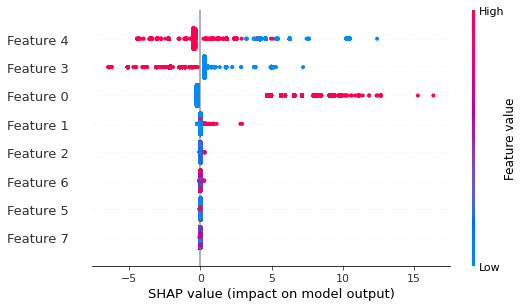

In [52]:
shap.plots.beeswarm(shap_values)  # YOUR CODE HERE

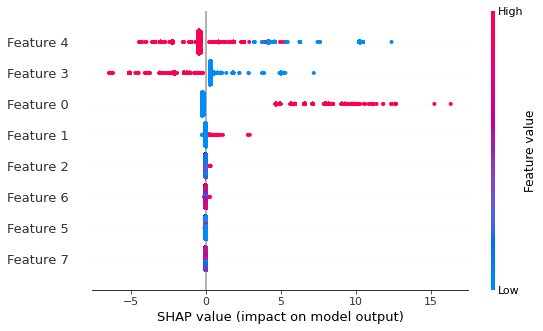

In [53]:
shap.summary_plot(shap_values)

7. What are features 4, 3, and 1? Does each feature positively or negatively contribute to the likelihood of purchase?

feature 4 is NumView and has a negative contribution to likelihood of a purchase.
f 3 is numcart and has a negative contribution to purchase,
f 1 is NumSessions and has a positive contribution to purchase.


# YOUR CODE HERE

8. Visualize the effects over all samples using `shap.plots.beeswarm()` or `shap.summary_plot()`. 

In [ ]:
# YOUR CODE HERE

9. Write your data (shap values) to a file and add them under the Model Explainability tab in the Streamlit app (see next section), following the example in Model Results tab.

10. Optional. Do the same for a random forest model.

## Task 6: AutoML

Let's see how AutoML performs on this imbalanced dataset. Similarly, for faster iteration on our workflow, experiment it on a small smaple. 

1. Take 5,000 samples from `train_df`, 5,000 from `test_df` for experimenting.

In [57]:
train_features = train_df.sample(int(5e3), random_state=42)
train_label = train_features.pop('Purchase')
test_features = test_df.sample(int(5e3), random_state=42)
test_label = test_features.pop('Purchase')

2. Instantiate and train a TPOT auto-ML classifier.

    The parameters in the code below are set to low values for faster iterations. 
    Read about each parameters [here](http://epistasislab.github.io/tpot/api/#classification) and experiment with different values when time permits.
    
    Set a proper [`scoring` function](http://epistasislab.github.io/tpot/using/#scoring-functions). 

In [58]:
%%time
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
                      scoring=  'balanced_accuracy',# YOUR CODE HERE
                      verbosity=2,
                      random_state=42)
tpot.fit(train_features, train_label)
print(f"Tpop score on test data: {tpot.score(test_features, test_label):.2f}")
tpot.export('tpot_electronics_pipeline.py')

Optimization Progress:   0%|          | 0/176 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9857142857142858

Generation 2 - Current best internal CV score: 0.9928571428571429

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Generation 6 - Current best internal CV score: 1.0

Generation 7 - Current best internal CV score: 1.0

Generation 8 - Current best internal CV score: 1.0

Generation 9 - Current best internal CV score: 1.0

Generation 10 - Current best internal CV score: 1.0

Best pipeline: BernoulliNB(PCA(input_matrix, iterated_power=8, svd_solver=randomized), alpha=0.001, fit_prior=False)
Tpop score on test data: 0.98
CPU times: user 16h 1min 10s, sys: 2h 37min 56s, total: 18h 39min 7s
Wall time: 4h 15min 6s


sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.


3. Examine the model pipeline that TPOT classifier offers in the python file `tpot_electronics_pipeline.py` in the `nb` directory. 
If you see any model, function, or class that are not familiar, look them up!

    Note: There is randomness to the way the TPOT searches, so it's possible you won't have exactly the same result as your classmate.

In [59]:
!cat tpot_electronics_pipeline.py

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 1.0
exported_pipeline = make_pipeline(
    PCA(iterated_power=8, svd_solver="randomized"),
    BernoulliNB(alpha=0.001, fit_prior=False)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
result

## selecting the data sets by hand as we do not have a complete data set, but rather a training set and a test set.

In [60]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline
from tpot.export_utils import set_param_recursive

In [61]:
training_features = train_df.drop('Purchase', axis=1)
testing_features = test_df.drop('Purchase', axis=1)
training_target = train_df['Purchase']
testing_target = test_df['Purchase']

In [66]:
exported_pipeline = make_pipeline(
    PCA(iterated_power=8, svd_solver="randomized"),
    BernoulliNB(alpha=0.001, fit_prior=False)
)

In [67]:
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

In [69]:
exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [71]:
from utils import display_metrics
display_metrics(testing_target , results)

Confusion Matrix: 
[[422797   1627]
 [    11   6109]]
Accuracy: 0.996
Recall: 0.998
Precision: 0.790
F1 Score: 0.882


4. Take the appropriate lines (e.g., updating path to data and the variable names) from `tpot_electronics_pipeline.py` to build a model on our training set and make predictions on the test set. 

    Choose approriate metrics to evaluate the prediction from TPOT. 
    
    Optional. Add this to Streamlit `models` in the next section.

## I am going to check the same model with the data we optimized above 'manually'


In [72]:
training_features2 = X_train_reduced
testing_features2 = X_test_reduced
training_target2 = y_train
testing_target2 = y_test

In [73]:
exported_pipeline2 = make_pipeline(
    PCA(iterated_power=8, svd_solver="randomized"),
    BernoulliNB(alpha=0.001, fit_prior=False)
)

In [74]:
exported_pipeline2.fit(training_features2, training_target2)
results = exported_pipeline2.predict(testing_features2)

In [75]:
display_metrics(testing_target2 , results)

Confusion Matrix: 
[[423015   1409]
 [    23   6097]]
Accuracy: 0.997
Recall: 0.996
Precision: 0.812
F1 Score: 0.895


## and the full automated run. cold have used one of the sets only.

In [86]:
tpot_data = pd.concat([train_df,test_df])
features = tpot_data.drop('Purchase', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['Purchase'], random_state=42)

# Average CV score on the training set was: 1.0
exported_pipeline = make_pipeline(
    PCA(iterated_power=8, svd_solver="randomized"),
    BernoulliNB(alpha=0.001, fit_prior=False)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [87]:
display_metrics(testing_target , results)

Confusion Matrix: 
[[264407    856]
 [     7   3820]]
Accuracy: 0.997
Recall: 0.998
Precision: 0.817
F1 Score: 0.899


## nothing beats the SVM for this problem.

## Advanced Visualizations with Streamlit and Plotly!
Let's visualize our results in a way that makes it easy to compare our models!  
[Streamlit](https://streamlit.io/) is a Python package that makes it easy to create bespoke, dynamic and interactive web apps for visualizations.  
Lightweight web apps like this are a great way to present results to stakeholders! 

First we need to build our results dataset to render in Streamlit.

In [76]:
from collections import defaultdict

results_data = defaultdict(list)

models = ["Logistic Regression", "SVM", "Gradient Boosting Classifier"]

for model, pred in zip(models, [lr_pred, svm_pred, gbt_pred]):
    confusion = confusion_matrix(y_test, pred)
    accuracy_ = accuracy(y_test, pred)
    recall_ = recall(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    results_data['model'].append(model)
    results_data['tn'].append(confusion[0][0])
    results_data['fp'].append(confusion[0][1])
    results_data['fn'].append(confusion[1][0])
    results_data['tp'].append(confusion[1][1])
    results_data['accuracy'].append(accuracy_)
    results_data['recall'].append(recall_)
    results_data['f1_score'].append(f1)
results_df = pd.DataFrame(results_data)
results_df

model      tn  fp  fn    tp  accuracy    recall  \
0           Logistic Regression  424417   7   0  6120  0.999984  1.000000   
1                           SVM  424424   0   0  6120  1.000000  1.000000   
2  Gradient Boosting Classifier  424422   2   5  6115  0.999984  0.999183   

   f1_score  
0  0.999428  
1  1.000000  
2  0.999428

In [77]:
# Write our results_df to CSV
results_df.to_csv("../dat/model_results.csv")

2. Then, we need to built Stremlit app. 
For today's assignment, we wrote the code for you.
However, understand the code in `electronics_purchase_predictions_stremlit.py` because you might need to write a Streamlit web app on your own for the future assignments. 

3. Once you inspected the code, you will need to start streamlit from CLI. 
Try looking up how to do this yourself.

HINT: this is a python file - maybe if you run it as a python file from the CLI, it will give you further instructions. 

Note - once you run the stremlit, the prompt will ask you to provide an email. 
You can leave the email blank. 

And you are done! 

## References

- This work is motivated by this [publication](https://arxiv.org/pdf/2010.02503.pdf) 
- [Comprehensive Guide on Feature Selection](https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook)
- [Common pitfalls and recommended practices](https://scikit-learn.org/stable/common_pitfalls.html)
- [Interactive Shapley Value Demonstration in Python](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/Interactive_Shapley_Values.ipynb)
- [Subsurface Data Analytics](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Feature_Ranking.ipynb)

### Questions

❓ What is the time complexity of SVM? What is it for Logistic Regression? Not familiar with the term "time complexity"?

Answ: Time complexity is a measure of how fast, or slow, an algorithm can perform, given a sample size of n.  It is usually expressed in big O notation (upper limit).

In the case of SVM, the time complexity varies from  O(n ^ 2) to O(n^3), which is very bad!  For Logistic Regression it is O(n * number of features), which is Fair.


What are training coefficients from logistic regression? ( how about SVM? check How does one interpret SVM feature weights? )
Leave your comments on interpretation of this logistic regression model.

YOUR CODE HERE The coeficient(s) from logistic regression represent the amount of increase (if the coeficient is positive) or decrease (if negative) in the log-odds-ratio of the prediction for a unit change in that preditictive variable.